In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import *
from sklearn import *
from sklearn.metrics import *
from mnist import *
from pandas import *
from datetime import date
from collections import namedtuple
import cv2
from sklearn.feature_extraction.text import *
from sklearn.naive_bayes import *
from sklearn.metrics import *
from scipy import *
from sklearn.metrics import confusion_matrix
import itertools
import os
from keras.utils.np_utils import * 
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.preprocessing.image import *
from keras.callbacks import *
from skimage.filters import threshold_local


In [7]:
homePath_train = "/home/giang/Desktop/ThucTap/Tuan3/data/"

In [8]:
chars = ['0', '1']
chars

['0', '1']

In [9]:
# ham xu li du lieu
def preprocessdata(homePath):
    data=[]
    label=[]
    
    for i,char in enumerate(chars):
        imgPath = homePath + char + "/"
        print(imgPath)
        imgFiles = os.listdir(imgPath)
#         kk = 0
        for image in imgFiles:
                
            img = cv2.imread(imgPath + image,0)
            img = cv2.resize(img, (28, 28))
            
#             print(img.shape)
#             noise_removal = cv2.bilateralFilter(img,9,75,75)

#             equal_histogram = cv2.equalizeHist(noise_removal)
#             img_pad = np.zeros([28, 28])
#             img_pad[6:26, 3:23] = img
            data.append(img)
            label.append(i)
    
    l = len(label)
    shutfle = list(range(l))
    random.shuffle(shutfle)
    train_data = np.array(data)
    train_label = np.array(label)
    train_data = train_data[shutfle]
    train_label = train_label[shutfle]
    return data,label

In [10]:
data,label = preprocessdata(homePath_train)

/home/giang/Desktop/ThucTap/Tuan3/data/0/
/home/giang/Desktop/ThucTap/Tuan3/data/1/


In [11]:
x = data
y = label

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_tt = y_test

In [13]:
X_train = reshape(X_train,(-1,28,28,1))
y_train = to_categorical(y_train, num_classes = 2)
X_test = reshape(X_test,(-1,28,28,1))
y_test = to_categorical(y_test, num_classes = 2)

<ipython-input-13-c4f5b2067eb1>:1: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_train = reshape(X_train,(-1,28,28,1))
<ipython-input-13-c4f5b2067eb1>:3: DeprecationWarning: scipy.reshape is deprecated and will be removed in SciPy 2.0.0, use numpy.reshape instead
  X_test = reshape(X_test,(-1,28,28,1))


In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])
# model.summary()
# res = model.fit(X_train, y_train, validation_split=0.2,shuffle=True,
#                  batch_size=256, epochs=200, verbose=1)

# model.save("b2_t3_moi2.h5")
# 200 epoch: 93.55
# model = load_model("bt2_t3_200epochs.h5") 
# model = load_model("b2_t3_moi.h5") 

In [15]:
model = load_model("b2_t3_moi2.h5") 

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)
score

[0.25166603938631765, 0.9503424763679504]

In [17]:
results = chars.copy()

In [18]:
# model = Sequential()
# model = create_model()

img_ = cv2.imread("/home/giang/Pictures/anhtest1000.jpg", 0)
X_test__ = cv2.resize(img_, (28, 28))

In [19]:
y_predict = model.predict(X_test__.reshape(1,28,28,1))
test_logits = np.argmax(y_predict, axis=-1)
res__ = results[int(test_logits)]
res__

'1'

In [20]:
kq = model.predict(X_test)
kq

array([[1.7285126e-06, 9.9999833e-01],
       [9.9999809e-01, 1.8753002e-06],
       [1.0000000e+00, 4.0211255e-18],
       ...,
       [9.9997854e-01, 2.1427182e-05],
       [9.9975485e-01, 2.4516275e-04],
       [9.9999905e-01, 9.8453950e-07]], dtype=float32)

In [21]:
resS = np.argmax(kq, axis=-1)
resS

array([1, 0, 0, ..., 0, 0, 0])

In [22]:
print(classification_report(y_tt, resS, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2342
           1       0.95      0.95      0.95      2330

    accuracy                           0.95      4672
   macro avg       0.95      0.95      0.95      4672
weighted avg       0.95      0.95      0.95      4672



In [23]:
# dau vao la duong dan cua anh (path)
# dau ra la ket qua phan loai ( co ban do hay khong )
def PrintResult(path):
    im_ = cv2.imread(path, 0)
    
    X_test__ = cv2.resize(im_, (28, 28))
    y_predict = model.predict(X_test__.reshape(1,28,28,1))
            
    test_logits = np.argmax(y_predict, axis=-1)
    if test_logits == 1:
        return 1
    
    im = cv2.imread(path, 1)
#     im = cv2.resize(im, (500, 500))
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

    noise_removal = cv2.bilateralFilter(im_gray,9,75,75)

    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)

    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)
    
    thresh_image = cv2.adaptiveThreshold(sub_morp_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                   cv2.THRESH_BINARY_INV,45,1)
    canny_image = cv2.Canny(thresh_image,250,255)
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
    dilated_image = cv2.bilateralFilter(dilated_image,9,75,75)
#     plt.imshow(cv2.cvtColor(dilated_image,cv2.COLOR_BGR2RGB))
#     plt.show()
    contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours= sorted(contours, key = cv2.contourArea, reverse = True)
    screenCnt = None
    roi_img = []
    check = 0
    for c in contours:
        peri = cv2.arcLength(c, True) 
#         print(peri)
        if(peri < 301):
            continue
        
        approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
#         if len(approx) == 4:
        
        if check == 0:
            screenCnt = approx
            (x,y,w,h) = cv2.boundingRect(screenCnt)
            roi = im[y:y+h,x:x+w]
            roi_ccc = roi
            roi_img.append(roi)
#             plt.imshow(cv2.cvtColor(roi_ccc,cv2.COLOR_BGR2RGB))
#             plt.show()
  
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        
            if (roi.shape[0] < 20 or roi.shape[1] < 20):
                continue
                
            X_test__ = cv2.resize(roi, (28, 28))
            y_predict = model.predict(X_test__.reshape(1,28,28,1))
            
            test_logits = np.argmax(y_predict, axis=-1)
                  
            res__ = results[int(test_logits)]

            if(res__ == '1'):
                if y_predict[0][1] < 0.9:
                    continue
                check = 1
#                 plt.imshow(cv2.cvtColor(roi_ccc,cv2.COLOR_BGR2RGB))
#                 plt.show()
                break

    # print(check)
    if(check == 1):
#         print("anh co chua ban do")
        return 1
    else:
#         print("anh khong chua ban do")
        return 0
        

In [24]:
PrintResult("/home/giang/Pictures/anhtu.jpg")

1

/home/giang/Downloads/Telegram Desktop/test/1/
154


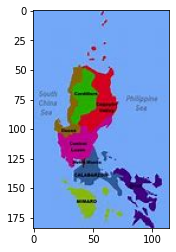

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (75).jpg


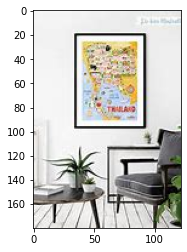

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue - 2020-07-31T141435.570.jpg


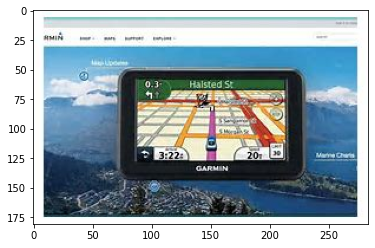

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue - 2020-07-31T141436.512.jpg


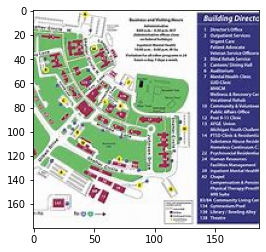

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (6).jpg


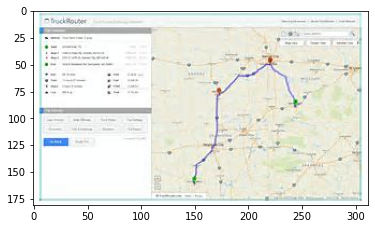

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue - 2020-07-31T141436.199.jpg


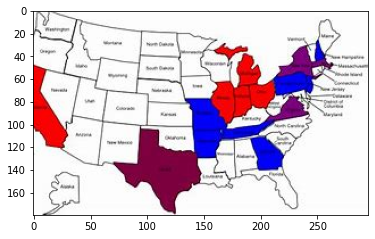

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (83).jpg


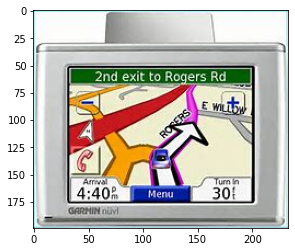

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue - 2020-07-31T141436.623.jpg


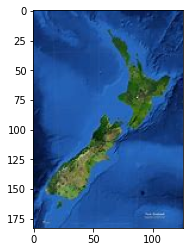

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (48).jpg


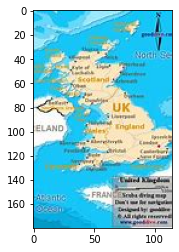

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (49).jpg


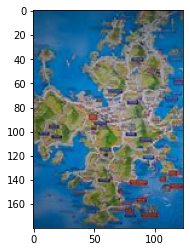

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (24).jpg


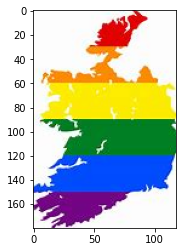

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue - 2020-07-31T141435.436.jpg


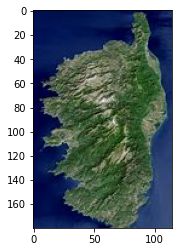

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (38).jpg


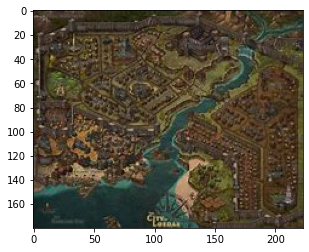

/home/giang/Downloads/Telegram Desktop/test/1/mapTrue (27).jpg


In [25]:
chars_ = ['1']
homePath_train = "/home/giang/Downloads/Telegram Desktop/test/"
it = 0
datas = []
for i,char in enumerate(chars_):
    imgPath = homePath_train + char + "/"
    print(imgPath)
    imgFiles = os.listdir(imgPath)
#         kk = 0
    print(len(imgFiles))
    for image in imgFiles:
        
        img = cv2.imread(imgPath + image,0)
        it += 1
        dd = PrintResult(imgPath + image)
        datas.append(dd)
        if dd == 0:
            roi_roi = cv2.imread(imgPath + image, 1)
            plt.imshow(cv2.cvtColor(roi_roi,cv2.COLOR_BGR2RGB))
            plt.show()
            print(imgPath + image)
# print(it)

In [26]:
a = sum(datas)
a

<ipython-input-26-88eb08bcaf90>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  a = sum(datas)


141

In [27]:
print("ti le dung la ", a/it)

ti le dung la  0.9155844155844156


In [28]:
chars_ = ['0']
datas = []
homePath_train = "/home/giang/Downloads/Telegram Desktop/test/"
it = 0
for i,char in enumerate(chars_):
    imgPath = homePath_train + char + "/"
    print(imgPath)
    imgFiles = os.listdir(imgPath)
#         kk = 0
#     it = 0
    print(len(imgFiles))
    for image in imgFiles:
   
        img = cv2.imread(imgPath + image,0)
        it += 1
   
#         img = cv2.resize(img, (28, 28))
        it += 1
        dd = PrintResult(imgPath + image)
#         if(dd == 1):
#             print(imgPath + image)
            
        datas.append(dd)
#         label.append(i)

/home/giang/Downloads/Telegram Desktop/test/0/
223


In [29]:
a = sum(datas)
a

<ipython-input-29-88eb08bcaf90>:1: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  a = sum(datas)


38

In [30]:
# 2806/4428
print("ti le dung la ", (223 - a)/223)

ti le dung la  0.8295964125560538


In [33]:
# dau vao la duong dan cua anh (path)
# dau ra la ket qua phan loai ( co ban do hay khong )
def PrintResult2(path):
    im = cv2.imread(path, 1)
#     im = cv2.resize(im, (500, 500))
    plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
    plt.show()
    im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

    noise_removal = cv2.bilateralFilter(im_gray,9,75,75)

    equal_histogram = cv2.equalizeHist(noise_removal)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(equal_histogram,cv2.MORPH_OPEN,kernel,iterations=20)

    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    ret,thresh_image = cv2.threshold(sub_morp_image,0,255,cv2.THRESH_OTSU)

    canny_image = cv2.Canny(thresh_image,250,255)
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(canny_image,kernel,iterations=1)
    plt.imshow(cv2.cvtColor(dilated_image,cv2.COLOR_BGR2RGB))
    plt.show()
    contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    contours= sorted(contours, key = cv2.contourArea, reverse = True)
    screenCnt = None
    roi_img = []
    check = 0
    for c in contours:
        peri = cv2.arcLength(c, True) 
        print(peri)
        if(peri < 301):
            continue
        
        approx = cv2.approxPolyDP(c, 0.06 * peri, True) 
        
#         if len(approx) == 4:
        if check == 0:
            screenCnt = approx
            (x,y,w,h) = cv2.boundingRect(screenCnt)
            roi = im[y:y+h,x:x+w]
            roi_ccc = roi
            roi_img.append(roi)
            plt.imshow(cv2.cvtColor(roi_ccc,cv2.COLOR_BGR2RGB))
            plt.show()
    #         plt.imshow(cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))
    #         plt.show()
            roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#             print("roi la ", roi.shape)
            if (roi.shape[0] < 20 or roi.shape[1] < 20):
                continue
            X_test__ = cv2.resize(roi, (28, 28))
            y_predict = model.predict(X_test__.reshape(1,28,28,1))
            print(" y predict", y_predict)
            test_logits = np.argmax(y_predict, axis=-1)
                
            res__ = results[int(test_logits)]

            if(res__ == '1'):
                if y_predict[0][1] < 0.9:
                    continue
                    
                check = 1
#                 plt.imshow(cv2.cvtColor(roi_ccc,cv2.COLOR_BGR2RGB))
#                 plt.show()
                break

    # print(check)
    if(check == 1):
#         print("anh co chua ban do")
        return 1
    else:
#         print("anh khong chua ban do")
        return 0
        

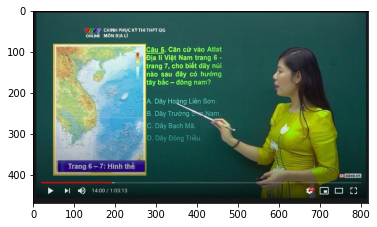

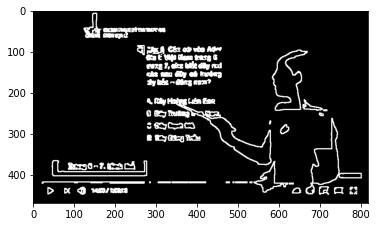

873.7371493577957


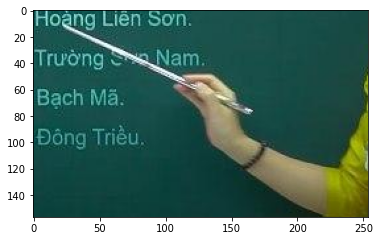

 y predict [[1.9263427e-06 9.9999809e-01]]
667.705624461174


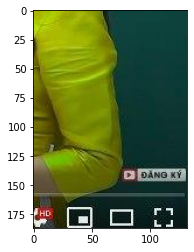

 y predict [[0.9628057 0.0371943]]
575.3452336788177


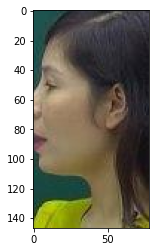

 y predict [[0.93175316 0.06824687]]
546.2741657495499


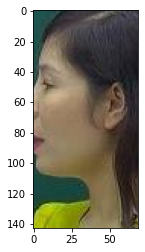

 y predict [[0.9694631 0.0305369]]
554.7005718946457


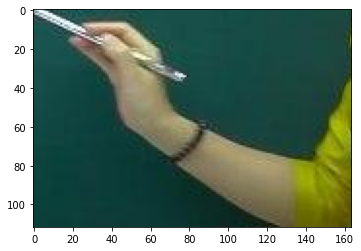

 y predict [[2.1854021e-06 9.9999785e-01]]
428.20815086364746


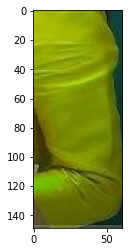

 y predict [[1.0000000e+00 1.2669421e-12]]
591.6984841823578


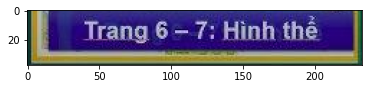

 y predict [[1.000000e+00 5.270938e-23]]
572.8700572252274


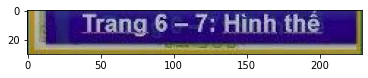

 y predict [[1.0000000e+00 1.2283886e-16]]
309.7228693962097


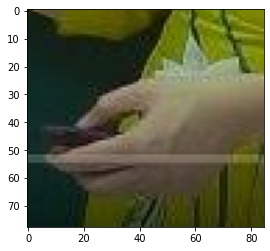

 y predict [[0.9988028  0.00119722]]
250.16652059555054
206.08326029777527
520.7279218435287


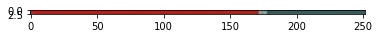

245.0538227558136
130.42640614509583
170.911687374115
177.15432798862457
111.8406194448471
191.9827550649643
112.28427076339722
105.4558436870575
117.5979790687561
116.18376553058624
118.97056245803833
167.35533845424652
146.6690467596054
90.28427064418793
125.11269772052765
96.97056245803833
89.4558436870575
101.4558436870575
135.49747383594513
94.38477599620819
158.6690467596054
109.11269783973694
127.94112455844879
107.01219260692596
76.18376612663269
86.62741661071777
96.28427076339722
95.35533845424652
146.42640614509583
85.21320295333862
92.28427064418793
176.48528122901917
77.4558435678482
84.5269113779068
96.28427064418793
88.97056245803833
159.01219260692596
115.84061968326569
98.04163014888763
79.31370830535889
87.4558436870575
65.11269783973694
119.4558436870575
76.72792184352875
77.4558436870575
82.87005722522736
84.87005722522736
74.97056245803833
67.21320307254791
82.28427064418793
86.38477599620819
66.62741661071777
84.87005722522736
62.62741661071777
97.11269772052765
5

0

In [34]:
PrintResult2("/home/giang/Pictures/anhtu.jpg")